In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", 20)
pd.set_option('display.max_columns', 500)

# Credit EDA Case Study

### Read the Application data & Inspect  the dataframe

The case study aims at understanding how consumer attributes and loan attributes influence the tendency of default. Using EDA we can analyse the patterns present in the data to study the indicators if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. Thereby ensuring applicants capable of repaying the loan are not rejected.  

In [3]:
df_app_data = pd.read_csv("application_data.csv")


#### Inspecting the dataframe for dimensions, null-values, and summary of different numeric columns.

In [4]:
df_app_data.shape

(307511, 122)

In [5]:
df_app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
df_app_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
df_app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### DATA HANDLING & CLEANING 

##### The basic inspection of the data has been done. A few columns seems to have some discrepancy. Through detail inspection on each column we can identify and rectify them as required. 

In [8]:
df_app_data.isna().sum().sort_values(ascending = False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

#### From the above we can understand there are several columns with very high missing values. To better understand lets check the percentage of missing values to help decision making. 

In [9]:
def missingdata_percentage(df):
    missing = pd.DataFrame(columns=['category','percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            percentage = 100*df[col].isna().sum()/df.shape[0]
            missing = missing.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
    return missing 

In [10]:
missingdata_percentage(df_app_data).sort_values(by='percentage',ascending=False)

,category,percentage
41,COMMONAREA_MEDI,69.872297
13,COMMONAREA_AVG,69.872297
27,COMMONAREA_MODE,69.872297
49,NONLIVINGAPARTMENTS_MEDI,69.432963
35,NONLIVINGAPARTMENTS_MODE,69.432963
...,...,...
7,EXT_SOURCE_2,0.214626
1,AMT_GOODS_PRICE,0.090403
0,AMT_ANNUITY,0.003902
5,CNT_FAM_MEMBERS,0.00065


Considering a 50% threshold for missing values is the ideal way forward. But when closely observed it is quite clear that a few columns with less than 50% missing values are all related to the normalized information about building where the client lives, to mention a few, FLOORSMAX_MEDI, FLOORSMAX_AVG, YEARS_BEGINEXPLUATATION_MEDI,EMERGENCYSTATE_MODE,etc

#### Hence we have decided to consider 40% threshold for the missing values and everything 40% can be dropped. 

In [11]:
x = len(df_app_data)*0.40
df_app_data.columns[df_app_data.isna().sum()> x] # Columns with more than 40% missing value for reference

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [12]:
df_app_data.shape

(307511, 122)

In [13]:
df_app_data = df_app_data[ df_app_data.columns[df_app_data.isna().sum()< x] ]

In [14]:
df_app_data.shape

(307511, 73)

# Univariate Analysis

#### After having tackled the missing values on a generic level. Lets start analysing each column and further address the discrpency while deriving insights from it.  

-----  AMT_ANNUITY Column

In [15]:
df_app_data.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [16]:
df_app_data.AMT_ANNUITY.isna().value_counts()

False    307499
True         12
Name: AMT_ANNUITY, dtype: int64

In [17]:
#imputing the annuity amount with median 
temp_med=df_app_data.AMT_ANNUITY.median()
df_app_data["AMT_ANNUITY"].fillna(temp_med, inplace = True)

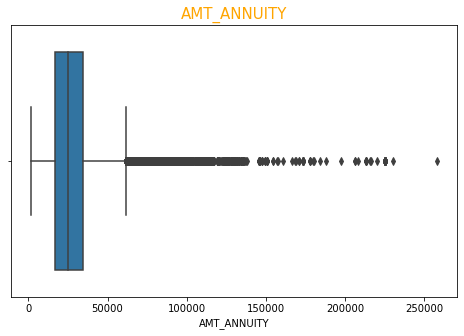

In [18]:
#checking outliers in amt_annuity column 
plt.figure(figsize = (8,5))
sns.boxplot(df_app_data.AMT_ANNUITY)
plt.title("AMT_ANNUITY", fontsize = 15, color="ORANGE")
plt.show()

There are good number of outliers in this column, which is natural as loan annuity amount depends on customer income, credit score, credit score plays a very important role in loan approvals, debt-to-income ratio, relationship with the lender, history of defaults etc. 

----Checking the -ve data variables example, DAYS_BIRTH has all negative values, we will correct it to positive values for mathematical sanity

---- DAYS_BIRTH column

In [19]:
df_app_data.DAYS_BIRTH = abs(df_app_data.DAYS_BIRTH)
df_app_data.DAYS_BIRTH[df_app_data.DAYS_BIRTH>0].count()

307511

In [20]:
#adding new column named 'DAYS_BIRTH_IN_YEARS'
df_app_data['DAYS_BIRTH_IN_YEARS']=(df_app_data.DAYS_BIRTH)/365
#rounding off to two decimal places 
df_app_data['DAYS_BIRTH_IN_YEARS']=df_app_data.DAYS_BIRTH_IN_YEARS.round(2)

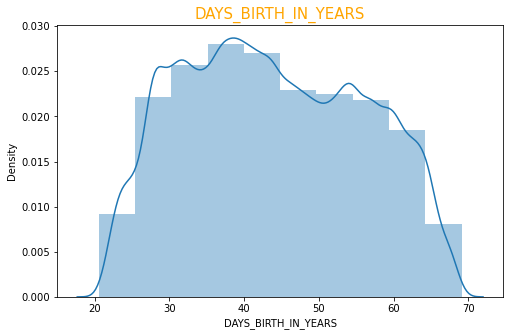

In [21]:
plt.figure(figsize = (8,5))
sns.distplot(df_app_data.DAYS_BIRTH_IN_YEARS,bins=10)
plt.title("DAYS_BIRTH_IN_YEARS", fontsize = 15, color="ORANGE")
plt.show()

Age group of the loan category is higher between 35-40. 

----DAYS_EMPLOYED column

In [22]:
df_app_data.DAYS_EMPLOYED = abs(df_app_data.DAYS_EMPLOYED)
df_app_data.DAYS_EMPLOYED[df_app_data.DAYS_EMPLOYED>0].count()

307509

In [23]:
#adding new column named 'DAYS_EMPLOYED_IN_YEARS' & rounding off to two decimal places
df_app_data['DAYS_EMPLOYED_IN_YEARS']= (df_app_data['DAYS_EMPLOYED'])/365
df_app_data['DAYS_EMPLOYED_IN_YEARS'] = df_app_data['DAYS_EMPLOYED_IN_YEARS'].round(2)

In [24]:
df_app_data.DAYS_EMPLOYED_IN_YEARS.describe()

count    307511.000000
mean        185.548007
std         382.039306
min           0.000000
25%           2.560000
50%           6.080000
75%          15.640000
max        1000.670000
Name: DAYS_EMPLOYED_IN_YEARS, dtype: float64

In [25]:
df_app_data.DAYS_EMPLOYED_IN_YEARS.value_counts().max()

55374

In [26]:
55374/307511*100

18.00716071945394

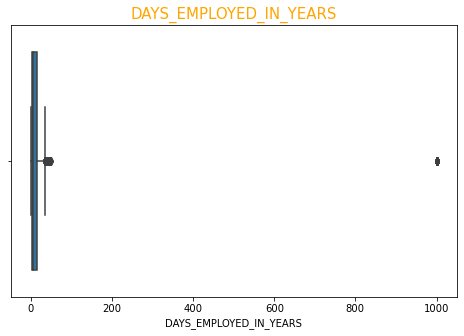

In [27]:
plt.figure(figsize = (8,5))
sns.boxplot(df_app_data.DAYS_EMPLOYED_IN_YEARS)
plt.title("DAYS_EMPLOYED_IN_YEARS", fontsize = 15, color="ORANGE")
plt.show()

From the above 3 assessments it is clearly seen that there is an outlier with a value of 1000.670000 years and the value count for this outlier is 55374. It can not be considered as a data entry mistake or an expected outlier. 

Hence, we shall not drop this data at the moment rather further inspect to find the reason for such a good quantity of data to have a similar value which stands out to be an outlier indicating some information.  

Inorder to conclude if this difference is a 'discrepancy' or 'deliberately' included data, lets study the Income type column  

----NAME_INCOME_TYPE column

In [28]:
df_app_data.NAME_INCOME_TYPE.value_counts(normalize=True)*100

Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64

In [29]:
df_app_data.DAYS_EMPLOYED_IN_YEARS[df_app_data.NAME_INCOME_TYPE=='Pensioner'].value_counts()

1000.67    55352
3.69           1
14.00          1
6.41           1
30.67          1
35.25          1
5.19           1
22.30          1
8.93           1
4.48           1
4.57           1
Name: DAYS_EMPLOYED_IN_YEARS, dtype: int64

In [30]:
df_app_data.DAYS_EMPLOYED_IN_YEARS[df_app_data.NAME_INCOME_TYPE=='Unemployed'].value_counts()

1000.67    22
Name: DAYS_EMPLOYED_IN_YEARS, dtype: int64

The analysis above clarifies the doubt. 

The data point of 1000.67 in DAYS_EMPLOYED_IN_YEARS belongs to 'Pensioner' & 'Unemployed' category of NAME_INCOME_TYPE column which could have been a 'code' or a number denoting that these customers are not working at present. Because the data type was in form of integer it got assessed as an outlier. 

Hence, by dropping them we would have lost out on some crucial information on giving loans to Persioners & Unemployed customers. 

Text(0.5, 1.0, 'NAME_INCOME_TYPE')

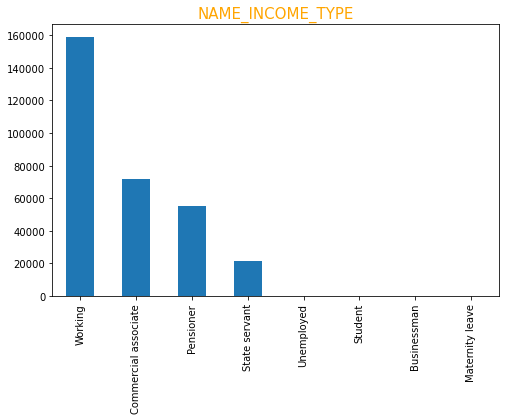

In [31]:
plt.figure(figsize = (8,5))
df_app_data.NAME_INCOME_TYPE.value_counts().plot.bar()
plt.title("NAME_INCOME_TYPE", fontsize = 15, color="ORANGE")

From the NAME_INCOME_TYPE column we get to see more than 50% of our loan applicants are from 'Working' category followed by 'Commercial Associate' & 'Pensioner' at the 3rd position. This again justifies our decision on retaining the 55351 pertaining to Pensioner. 

---- OCCUPATION_TYPE column

In [32]:
df_app_data.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [33]:
df_app_data.OCCUPATION_TYPE.isnull().sum()

96391

In [34]:
df_app_data.OCCUPATION_TYPE.isnull().sum()/len(df_app_data)*100

31.345545362604916

OCCUPATION_TYPE could play a crucial role in deriving inferences hence treating Null values as 'Unknown' values. 


In [35]:
df_app_data.OCCUPATION_TYPE.fillna("Unknown", inplace=True)

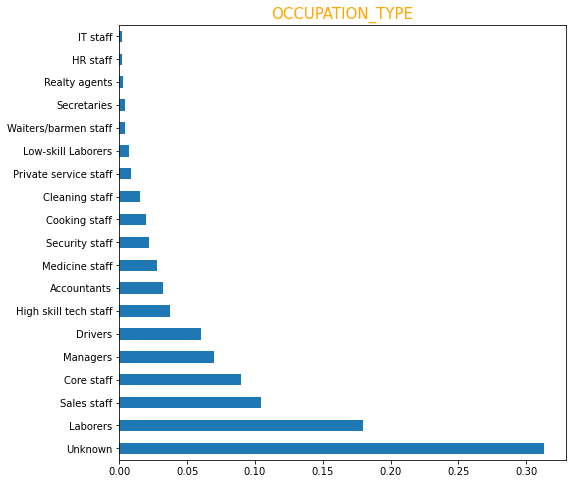

In [36]:
plt.figure(figsize=[8,8])
df_app_data.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.title("OCCUPATION_TYPE", fontsize = 15, color="ORANGE")
plt.show()

Occupation type has more than 30% missing data which is reflected in the 'Unknown' category. Forgoing that, out of the remaining 65% applicants majority are in the 'Labour' category out of the 18 categories in the OCCUPATION_TYPE column. 

---- CODE_GENDER column

In [37]:
df_app_data.CODE_GENDER.value_counts(normalize=True)*100

F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64

Imputing the 'XNA' category in the CODE_GENDER column to the 'F' category as it has majority. 

In [38]:
df_app_data.loc[df_app_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df_app_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

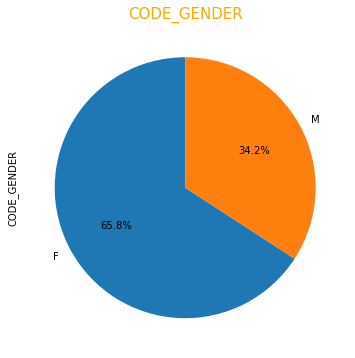

In [39]:
df_app_data.CODE_GENDER.value_counts(normalize=True).plot(kind='pie', startangle=90,
figsize=(6,6), autopct='%1.1f%%')
plt.title("CODE_GENDER", fontsize =15, color ='Orange')
plt.show()

This has a very interesting reflection 65% of the loan applicants are Female refered to as "F" and only 34.2% are Males referred to as "M". Towards the bivariate analysis we shall dive deeper into studying Gender role in the loan application. 

----DAYS_REGISTRATION column

In [40]:
df_app_data.DAYS_REGISTRATION = abs(df_app_data.DAYS_REGISTRATION)

In [41]:
#adding new column named ''DAYS_REGISTRATION_IN_YEARS' & rounding off to two decimal places
df_app_data['DAYS_REGISTRATION_IN_YEARS'] = (df_app_data['DAYS_REGISTRATION'])/365
df_app_data['DAYS_REGISTRATION_IN_YEARS'] = df_app_data['DAYS_REGISTRATION_IN_YEARS'].round(2)

----DAYS_ID_PUBLISH column

In [42]:
df_app_data.DAYS_ID_PUBLISH = abs(df_app_data.DAYS_ID_PUBLISH)

In [43]:
# After adding 3 new columns after rounding them in database, lets check how it looks
df_app_data[['DAYS_BIRTH_IN_YEARS','DAYS_EMPLOYED_IN_YEARS','DAYS_REGISTRATION_IN_YEARS']].head()

,DAYS_BIRTH_IN_YEARS,DAYS_EMPLOYED_IN_YEARS,DAYS_REGISTRATION_IN_YEARS
0,25.92,1.75,9.99
1,45.93,3.25,3.25
2,52.18,0.62,11.67
3,52.07,8.33,26.94
4,54.61,8.32,11.81


Quick glance through the data set after post the implemented changes.

In [44]:
#Quick glance through the data set after post the implemented changes.
df_app_data.shape

(307511, 76)

----NAME_TYPE_SUITE column

In [45]:
#checking null values in NAME_TYPE_SUITE   
df_app_data.NAME_TYPE_SUITE.isnull().sum()/len(df_app_data)*100

0.42014757195677555

NAME_TYPE_SUITE is a catagorical data with 0.42% missing values, we can impute the data using 'mode' of the data

In [46]:
df_app_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [47]:
#Impute the data using 'mode' of the data which is "UNACCOMPANIED"
temp_mod=df_app_data.NAME_TYPE_SUITE.mode()
df_app_data.NAME_TYPE_SUITE.fillna(temp_mod.iloc[0],inplace=True)

In [48]:
#cross check 
df_app_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

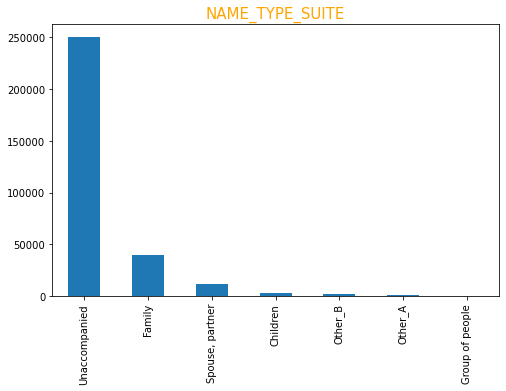

In [49]:
plt.figure(figsize=(8,5))
df_app_data.NAME_TYPE_SUITE.value_counts().plot.bar()
plt.title("NAME_TYPE_SUITE", fontsize=15, color="Orange")
plt.show()

----NAME_FAMILY_STATUS

In [50]:
df_app_data.NAME_FAMILY_STATUS.value_counts(normalize=True)*100

Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580
Separated                6.429038
Widow                    5.231683
Unknown                  0.000650
Name: NAME_FAMILY_STATUS, dtype: float64

63.87+9.68 which means more than 73% of the applicant are married customers. From this we can infer that majority of the target customers are in the married category as compared to single/ not married. Hence, their loan could be recurring or long-term in nature.

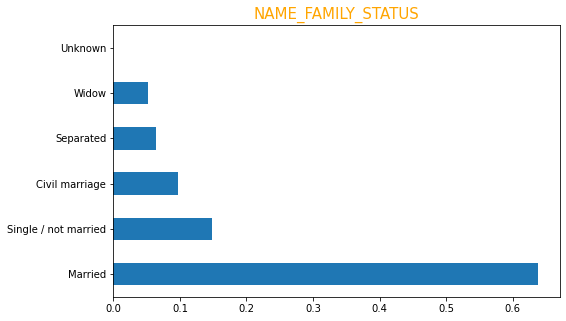

In [51]:
plt.figure(figsize=(8,5))
df_app_data.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title("NAME_FAMILY_STATUS",fontsize=15, color="Orange");
plt.show()

----CNT_CHILDREN column

In [52]:
df_app_data.CNT_CHILDREN.describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

Max at 19 for Count of Children is impractical, moreover as mentioned in the case study describtion this data is of urban customers and not rural hence there could be a data entry mistake. 

In [53]:
df_app_data.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [54]:
df_app_data.CNT_CHILDREN[df_app_data.NAME_FAMILY_STATUS=='Single / not married'].value_counts()

0     38810
1      5578
2       958
3        85
4         9
19        2
9         1
5         1
Name: CNT_CHILDREN, dtype: int64

In [55]:
len(df_app_data[(df_app_data['NAME_FAMILY_STATUS'] == "Single / not married") & (df_app_data["CNT_CHILDREN"]>0)])

6634

There are some extreme outliers in the CNT_CHILDREN column. On performing some further analysis along with NAME_FAMILY_STATUS=='Single / not married' it revealed some discripancies where there are UNMARRIED people with 9 children. 

In [56]:
df_app_data.CNT_CHILDREN[df_app_data.NAME_FAMILY_STATUS=='Single / not married'] = 0

In [57]:
df_app_data.CNT_CHILDREN[df_app_data.NAME_FAMILY_STATUS=='Single / not married'].value_counts()

0    45444
Name: CNT_CHILDREN, dtype: int64

In [58]:
df_app_data=df_app_data[df_app_data.CNT_CHILDREN<9]

Dropping all rows with CNT_CHILDREN greater than 9

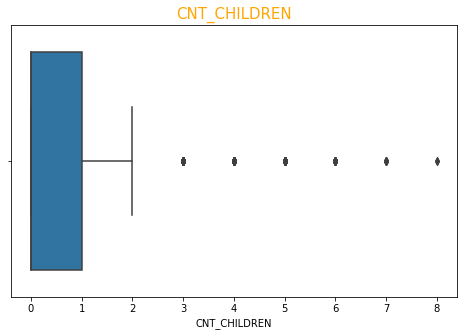

In [59]:
plt.figure(figsize=(8,5))
sns.boxplot(df_app_data.CNT_CHILDREN)
plt.title("CNT_CHILDREN",fontsize=15, color="Orange")
plt.show()

In [60]:
df_app_data.CNT_CHILDREN.value_counts()

0    222005
1     55541
2     25791
3      3632
4       420
5        83
6        21
7         7
8         2
Name: CNT_CHILDREN, dtype: int64

In [61]:
df_app_data.shape

(307502, 76)

----CNT_FAM_MEMBERS column

In [62]:
df_app_data.CNT_FAM_MEMBERS.describe(include=[np.nan])

count    307500.000000
mean          2.152328
std           0.908515
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [63]:
df_app_data.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
20.0         2
Name: CNT_FAM_MEMBERS, dtype: int64

CNT_FAM_MEMBERS can have outliers but a count 10 make need to be imputed or dropped. Here we have decided to drop 5 rows with Family Members count above 9. 

In [64]:
df_app_data=df_app_data[df_app_data.CNT_FAM_MEMBERS<10]

In [65]:
df_app_data.shape

(307495, 76)

## Catagorical ordered univariate analysis

---- NAME_EDUCATION_TYPE column

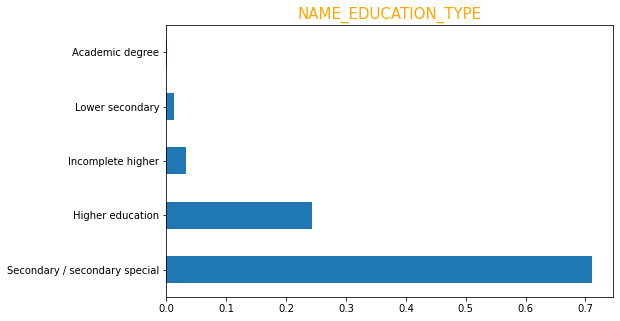

In [66]:
#plot the bar graph of percentage NAME_EDUCATION_TYPE categories
plt.figure(figsize=(8,5))
df_app_data.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh()
plt.title("NAME_EDUCATION_TYPE",fontsize=15, color="Orange")
plt.show()

Ordered variables have some kind of ordering eg. high medium low
Most of the loan applicants are in the Secondary/secondary special segment which comprises more than 70% of the applicant. Around 20% of the applicants have completed their higher education as well. 

## Binning 

Some variables can be best studied when they are categorized in a range of bins. Here's binning a few to learn customer attributes better. 

---- AMT_CREDIT column

In [67]:
df_app_data.AMT_CREDIT.describe()

count    3.074950e+05
mean     5.990296e+05
std      4.024948e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

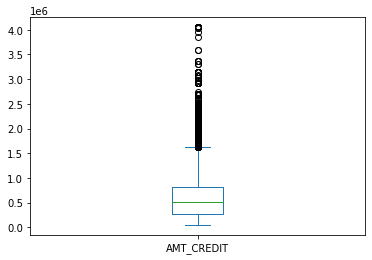

In [68]:
df_app_data.AMT_CREDIT.plot.box()
plt.show()

From the box plot we can understand that the data is scattered and have several outliers. By binning this column we can replace values contained into a small interval with a single representative value for that interval. Improving the accuracy of the analysis being performed.

In [69]:
#Creating bins for Credit amount
#converting numerical variable to categorical for better analysis
bins = [0,200000,500000,1000000,2000000,3000000,1000000000]
slots = ['0-200000','200000-500000','500000-1000000','1000000-2000000','2000000-3000000','3000000+']

df_app_data['AMT_CREDIT_RANGE']=pd.cut(df_app_data['AMT_CREDIT'],bins=bins,labels=slots)

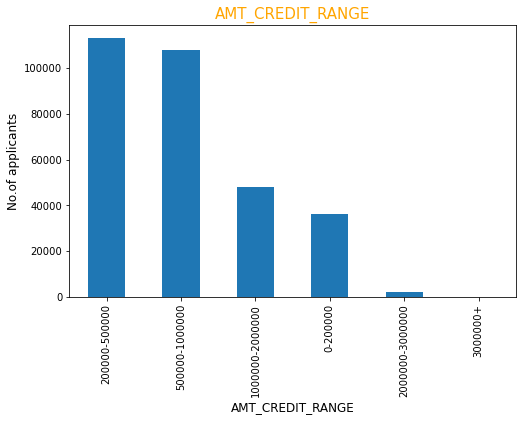

In [70]:
plt.figure(figsize=(8,5))
df_app_data['AMT_CREDIT_RANGE'].value_counts().plot.bar()
plt.title("AMT_CREDIT_RANGE",fontsize=15, color="Orange")
plt.xlabel("AMT_CREDIT_RANGE", fontsize = 12, color ='Black')
plt.ylabel("No.of applicants", fontsize = 12, color ='Black')
plt.show()

1. Majority of the loan amounts fall in bucket of 2lakh - 5lakh which holds more than 1lakh loan applicants.
2. Next is bucket of 5lakh - 10lakh which again holds a total no.of applicants more than 1lakh but less than the 2lakh to 5lakh bucket.
3. From the data set with more than 3lakh data set more than 2lakh data points fall between credit value of 2lakh to 10lakh

---- AMT_INCOME_TOTAL column

In [71]:
#now lets do the binning for income of these applicants
bins_=[0,60000,100000,200000,400000,800000,1200000,3000000,10000000000]
labels = ["0-60000" , "60000-100000" , "100000-200000","200000-400000","400000-800000","800000-1200000","1200000-3000000","3000000+"]

df_app_data["AMT_INCOME_RANGE"] = pd.cut(df_app_data["AMT_INCOME_TOTAL"] , bins = bins_ ,labels=labels)

In [72]:
df_app_data["AMT_INCOME_RANGE"].value_counts()

100000-200000      155893
200000-400000       79846
60000-100000        55144
0-60000              8550
400000-800000        7486
800000-1200000        418
1200000-3000000       141
3000000+               17
Name: AMT_INCOME_RANGE, dtype: int64

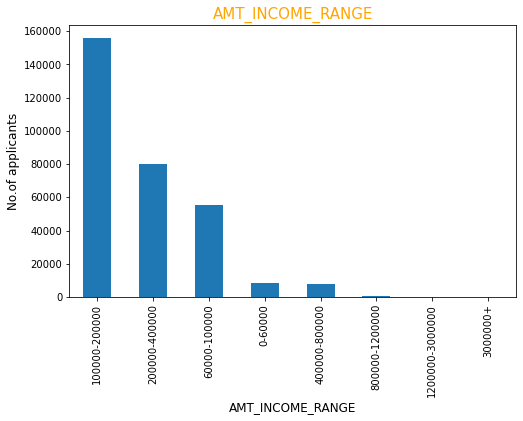

In [73]:
plt.figure(figsize=(8,5))
df_app_data['AMT_INCOME_RANGE'].value_counts().plot.bar()
plt.title("AMT_INCOME_RANGE",fontsize=15, color="Orange")
plt.xlabel("AMT_INCOME_RANGE", fontsize = 12, color ='Black')
plt.ylabel("No.of applicants", fontsize = 12, color ='Black')
plt.show()

1. Majority of the loan applicants are from the income ranging between 1lakh -2lakh to be precise the count is 155893. 

--- DAYS_BIRTH_IN_YEARS column

In [74]:
df_app_data["AGE_RANGE"] = pd.cut(df_app_data['DAYS_BIRTH_IN_YEARS'] , bins = [0,18,25,30,40,50,60,70,100,2000] , labels = ['0-18','18-25','25-30','30-40','40-50','50-60','60-70','70-100','100+'])

In [75]:
df_app_data["AGE_RANGE"].value_counts()

30-40     82309
40-50     76520
50-60     68065
60-70     35562
25-30     32864
18-25     12175
0-18          0
70-100        0
100+          0
Name: AGE_RANGE, dtype: int64

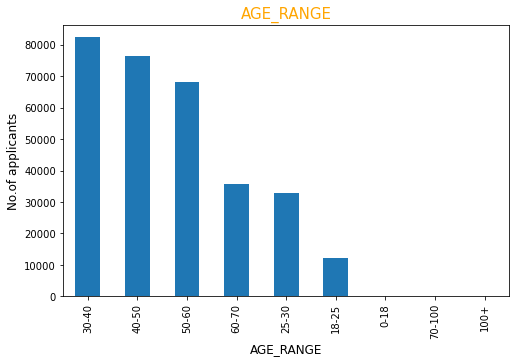

In [76]:
plt.figure(figsize=(8,5))
df_app_data['AGE_RANGE'].value_counts().plot.bar()
plt.title("AGE_RANGE",fontsize=15, color="Orange")
plt.xlabel("AGE_RANGE", fontsize = 12, color ='Black')
plt.ylabel("No.of applicants", fontsize = 12, color ='Black')
plt.show()

1. Just as observed in the earlier provided histogram on DAYS_BIRTH_IN_YEARS, most of the applicants are between the age group of 30-40.
2. Following is the grouping of 40-50 age group and 50-60 age group. 
3. We do not have any applicants who are below 18 and above 70years of age in this dataset. Which implies that we have only the income generating age groups applying for loan. 

## Checking Imbalance of application data set

----TARGET

In [77]:
df_app_data.TARGET.dtype

dtype('int64')

In [78]:
df_app_data.TARGET.value_counts(normalize=True)*100

0    91.927674
1     8.072326
Name: TARGET, dtype: float64

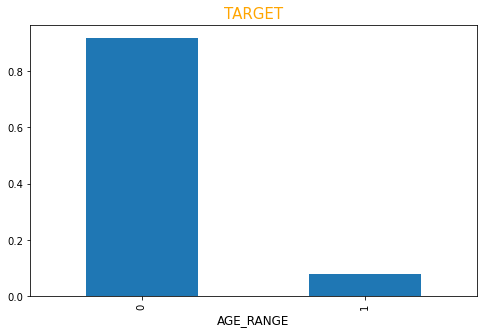

In [79]:
plt.figure(figsize=(8,5))
df_app_data.TARGET.value_counts(normalize=True).plot.bar()
plt.title("TARGET",fontsize=15, color="Orange")
plt.xlabel("AGE_RANGE", fontsize = 12, color ='Black')
plt.show()

As there is visible data imbalance. Lets sort the data by paritioning it further to analyse how consumer attributes and loan attributes influence the tendency of default

92% of the applicants by far has been regular with their payments. Only 8% have had atleast 1 default/late payment. 

In [80]:
## Paritioning to further analyse how consumer attributes and loan attributes influence the tendency of default. 

difficulty_df_app = df_app_data[df_app_data.TARGET == 1]   # Difficulty with payment 
no_difficulty_df_app = df_app_data[df_app_data.TARGET == 0]   # No Difficulty with payment 

In [81]:
difficulty_df_app.shape

(24822, 79)

In [82]:
no_difficulty_df_app.shape

(282673, 79)

In [83]:
no_difficulty_df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_IN_YEARS,DAYS_EMPLOYED_IN_YEARS,DAYS_REGISTRATION_IN_YEARS,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.93,3.25,3.25,1000000-2000000,200000-400000,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.18,0.62,11.67,0-200000,60000-100000,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52.07,8.33,26.94,200000-500000,100000-200000,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.61,8.32,11.81,500000-1000000,100000-200000,50-60
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,46.41,4.35,13.62,200000-500000,60000-100000,40-50


## Bivariate Analysis

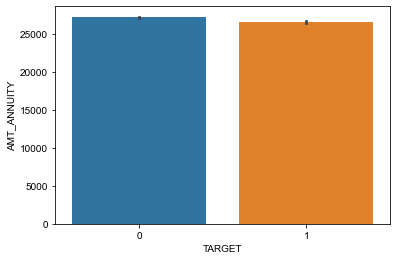

In [84]:
sns.barplot(data=df_app_data, x="TARGET", y="AMT_ANNUITY")
sns.set_theme(style="whitegrid")
plt.show()

Despite of having a huge imbalance between Target 1 & Target 0, which as seen before is 92% and 8% respectively, the mean avergae of Annuity Amount is nearly equal for both target categories. Which means the average of total annuity amount of a deafulter category is equal to that of customers paying on time. 
This reflects how lenient the scrutiny of the loan applications has been done which could lead company to a higher risk of loss. 

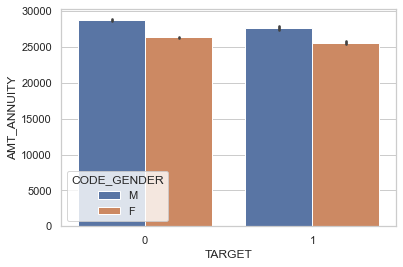

In [85]:
sns.barplot(data=df_app_data, x="TARGET", y="AMT_ANNUITY", hue="CODE_GENDER")
plt.show()

### Age vs Target

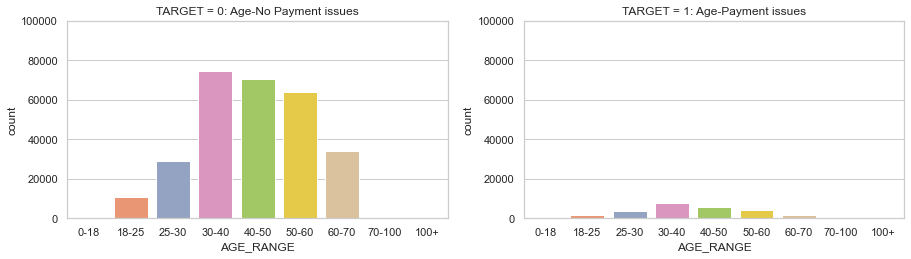

In [86]:
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('TARGET = 0: Age-No Payment issues')
sns.countplot(no_difficulty_df_app['AGE_RANGE'] , palette="Set2")

# subplot 2
plt.subplot(2, 2, 2)
plt.title('TARGET = 1: Age-Payment issues')
plt.ylim(0,100000)
sns.countplot(difficulty_df_app['AGE_RANGE'] , palette="Set2");
plt.show()

The is a considerable ratio between Target = 0 & Target =1 tables with respect to the age category. 
Thus, no major insights can be consider.

### Credit Range vs Target

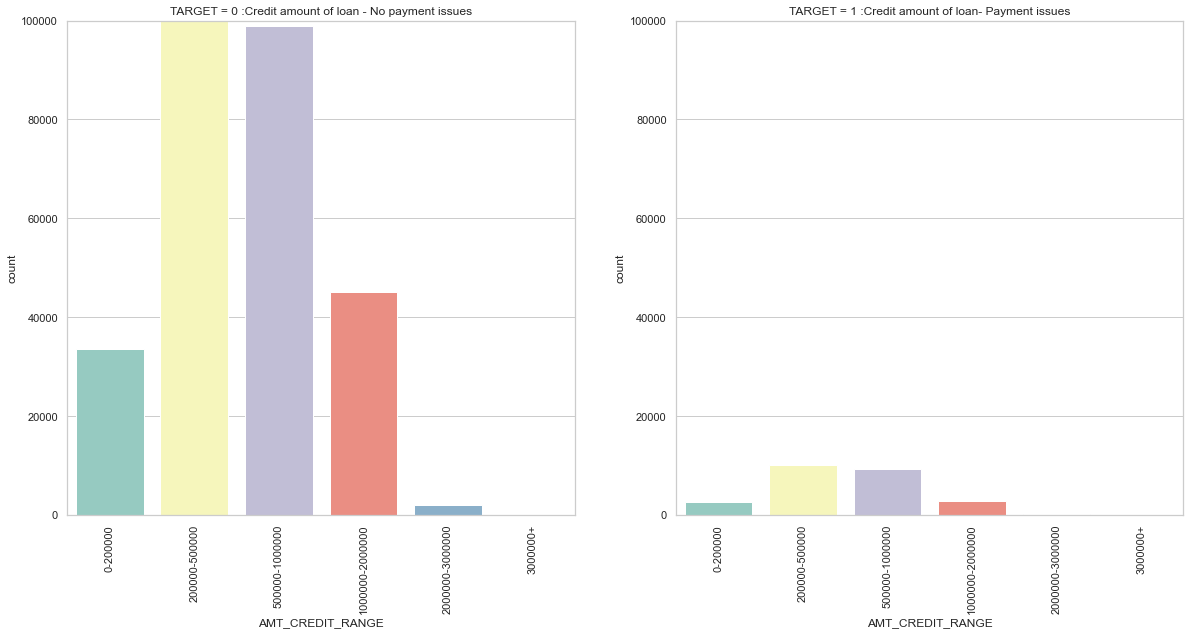

In [87]:
# subplot 1
plt.figure(figsize = (20, 20))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('TARGET = 0 :Credit amount of loan - No payment issues')
sns.countplot(no_difficulty_df_app['AMT_CREDIT_RANGE'] , palette="Set3" )
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(2, 2, 2)
plt.title('TARGET = 1 :Credit amount of loan- Payment issues')
plt.ylim(0,100000)
sns.countplot(difficulty_df_app['AMT_CREDIT_RANGE'] , palette="Set3")
plt.xticks(rotation = 90)
plt.show()

Clients with Credit range between 2,00,000 - 5,00,000 & 5,00,000 - 10,00,000 though have a higher number of defaulter their ratio in comparison to that of Target = 0 is much better than credit amount 0-2,00,000 & 10,00,000 - 2,00,000


### Categorical variable analysis - Occupation Type Vs Target

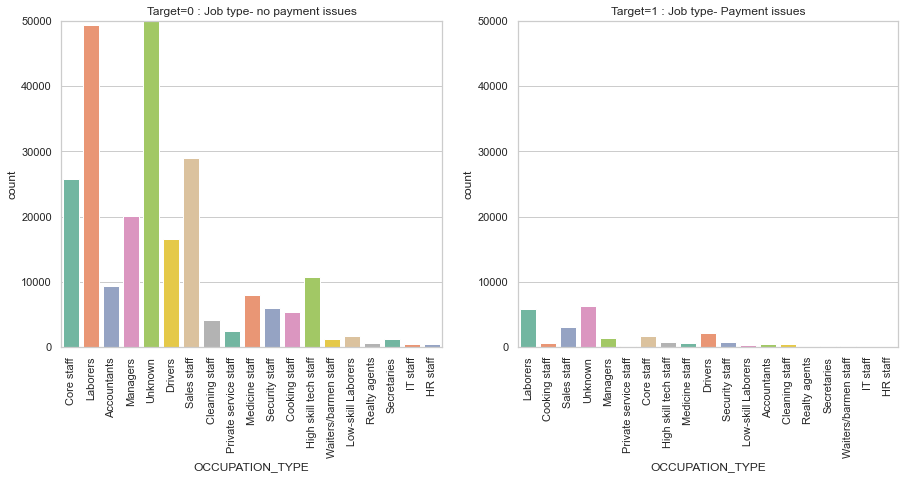

In [88]:
plt.figure(figsize = (15,6))
plt.subplot(1, 2, 1)
#plt.subplots_adjust(wspace=0.5)


sns.countplot(no_difficulty_df_app['OCCUPATION_TYPE'] , palette="Set2")
plt.title('Target=0 : Job type- no payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(difficulty_df_app['OCCUPATION_TYPE'] , palette="Set2")
plt.title('Target=1 : Job type- Payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 90)
plt.show()

1. Categories like Managers, Sales staff, Drivers show a more unreliable tread in the payments. 
2. Professions like High skill tech staff, Medicine staff, HR staff, IT staff, Secretaries, Reality agents are reliable for credits as they have low or nill payment issues.

### Categorical variable analysis - Income Type vs Target

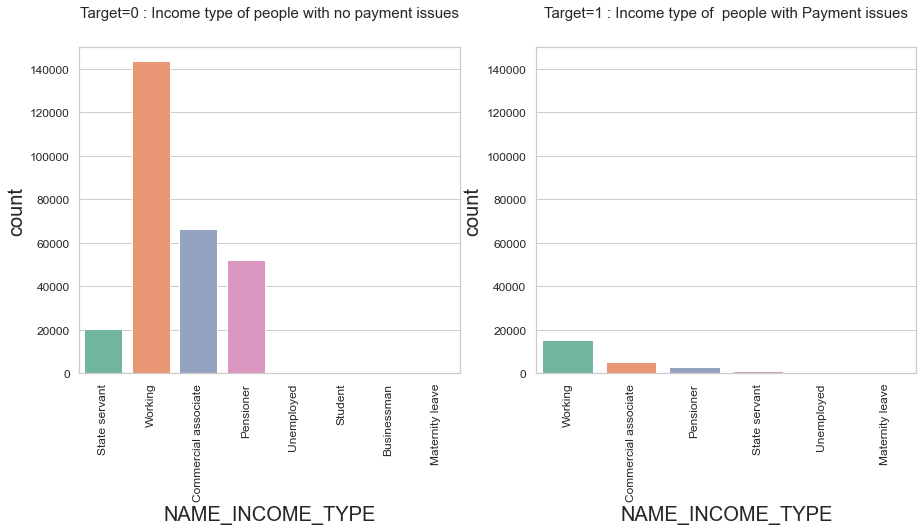

In [89]:
plt.figure(figsize = (15,6))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlepad'] = 30
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.subplot(1, 2, 1)
#plt.title()
sns.countplot(no_difficulty_df_app['NAME_INCOME_TYPE'].dropna() , palette="Set2")
plt.title('Target=0 : Income type of people with no payment issues')
plt.ylim(0,150000)
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(difficulty_df_app['NAME_INCOME_TYPE'].dropna() , palette="Set2")
plt.title('Target=1 : Income type of  people with Payment issues')
plt.ylim(0,150000)
plt.xticks(rotation = 90)
plt.show()

Plot shows that working class of people have very high percentage of paying back the loan.
List item

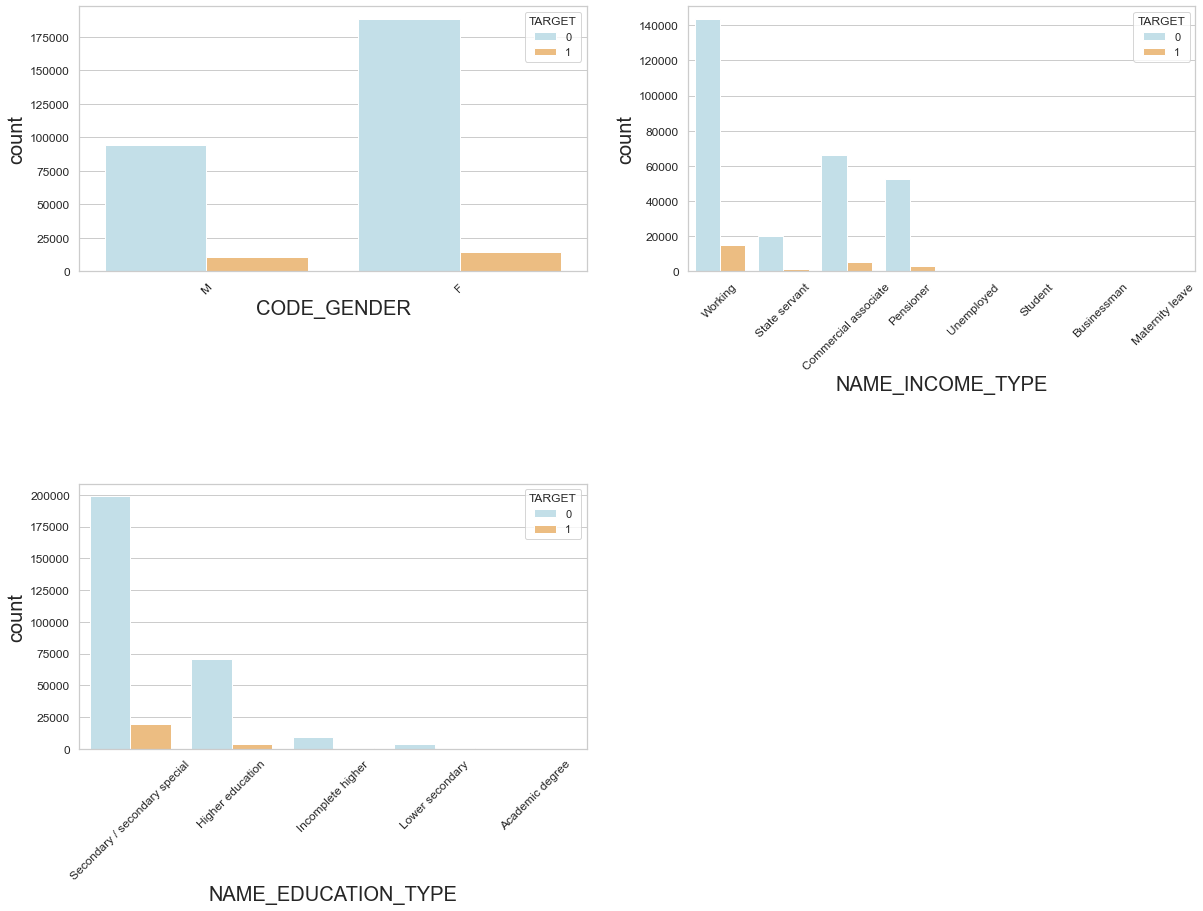

In [90]:
features = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']
plt.figure(figsize = (20, 40))

plt.subplots_adjust(hspace=0.8)
for i in enumerate(features):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'TARGET', data = df_app_data , palette="RdYlBu_r")
    plt.xticks(rotation = 45)

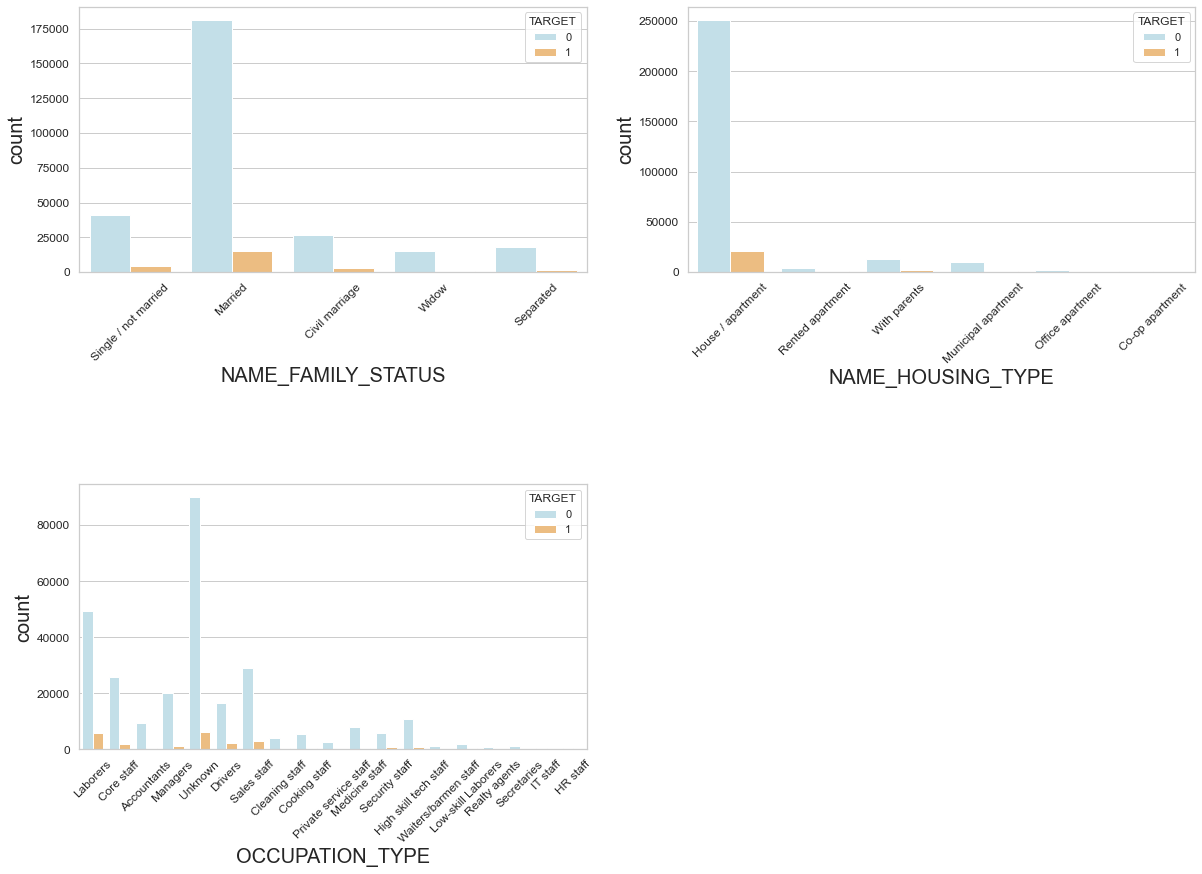

In [91]:
features = ['NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
plt.figure(figsize = (20, 40))

plt.subplots_adjust(hspace=0.8)
for i in enumerate(features):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'TARGET', data = df_app_data , palette='RdYlBu_r')
    plt.xticks(rotation = 45)

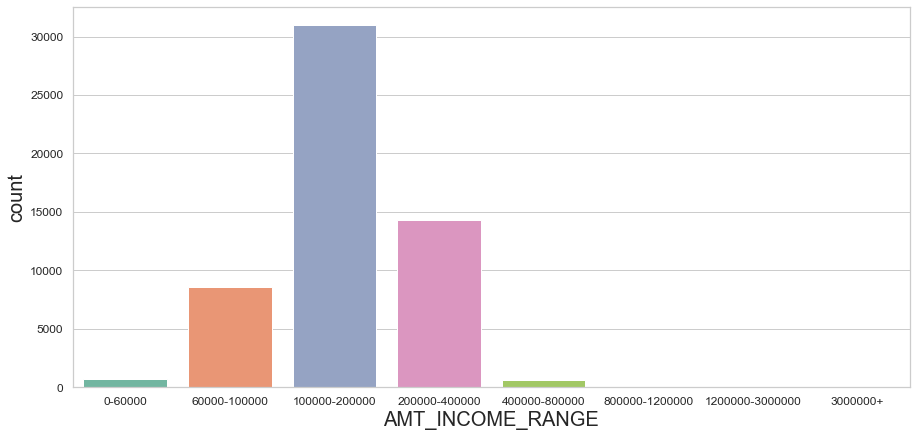

In [92]:
plt.figure(figsize = (15,7))
sns.countplot(df_app_data.AMT_INCOME_RANGE[df_app_data.OCCUPATION_TYPE == "Laborers"] , palette="Set2")    # Income Range of Laborers

plt.show()

1. As Most of Laborers are at low income range.
2. It is more feasible to give them small Loans . 
3. As they have good payback trend they can be considered for small loans

## Correlation Matrix

In [93]:
#For target_1 dataframe we find correlation
corr = difficulty_df_app.corr()

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corr.unstack().reset_index()
corrdf.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute valucorrdf['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
2078,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
4042,DAYS_REGISTRATION_IN_YEARS,DAYS_REGISTRATION,1.00
3912,DAYS_BIRTH_IN_YEARS,DAYS_BIRTH,1.00
3977,DAYS_EMPLOYED_IN_YEARS,DAYS_EMPLOYED,1.00
388,AMT_GOODS_PRICE,AMT_CREDIT,0.98
1299,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
1154,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
2143,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
1559,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.85
1754,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.78


In [94]:
#correlation matrix for all numerical columns
corr=no_difficulty_df_app.corr()
corr=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corr.unstack().reset_index()
corrdf.columns=['VAR1','VAR2','Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = corrdf['Correlation'].abs()
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
3977,DAYS_EMPLOYED_IN_YEARS,DAYS_EMPLOYED,1.00
3981,DAYS_EMPLOYED_IN_YEARS,FLAG_EMP_PHONE,1.00
4042,DAYS_REGISTRATION_IN_YEARS,DAYS_REGISTRATION,1.00
2078,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
841,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
3912,DAYS_BIRTH_IN_YEARS,DAYS_BIRTH,1.00
388,AMT_GOODS_PRICE,AMT_CREDIT,0.99
1299,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
1154,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
1559,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.86


From these correlations we can say that in both "no_difficulty_df_app" and "difficulty_df_app" data frames, social circle for 30days and 60 days and, goods_price and credit are highly correlated.

## Numeric-Numeric analysis

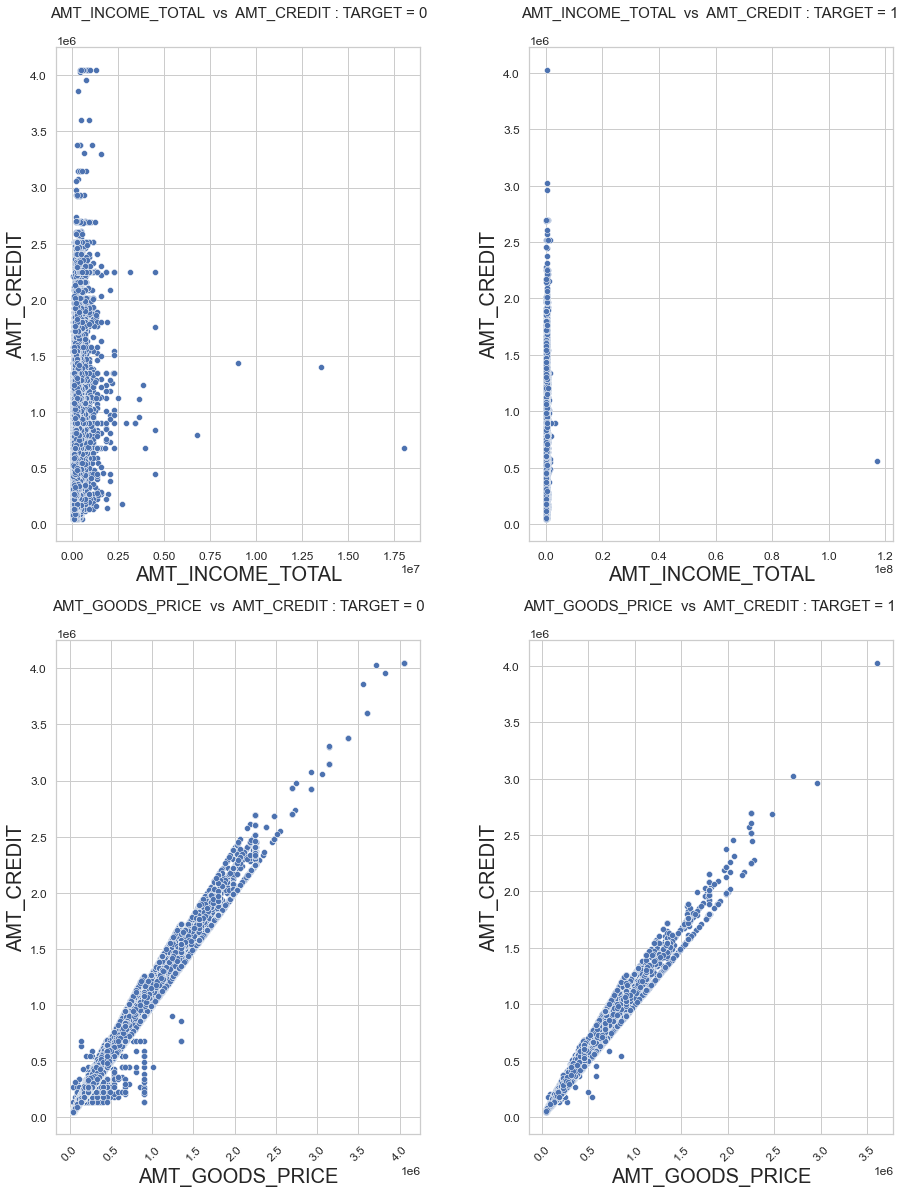

In [95]:
#Scatter plot for numeric columns

plt.figure(figsize = (15, 20))
plt.subplots_adjust(wspace=0.3)


plt.subplot(2,2,1)
sns.scatterplot(no_difficulty_df_app.AMT_INCOME_TOTAL,no_difficulty_df_app.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT : TARGET = 0')

plt.subplot(2,2,2)
sns.scatterplot(difficulty_df_app.AMT_INCOME_TOTAL,difficulty_df_app.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT : TARGET = 1 ')

plt.subplot(2,2,3)
sns.scatterplot(no_difficulty_df_app.AMT_GOODS_PRICE,no_difficulty_df_app.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT : TARGET = 0')
plt.xticks(rotation = 45)

plt.subplot(2,2,4)
sns.scatterplot(difficulty_df_app.AMT_GOODS_PRICE,difficulty_df_app.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT : TARGET = 1 ')
plt.xticks(rotation = 45)
plt.show()

Those who payback the loan on time can get higher credits. Mosty low income clients have difficulties in paying installments and therefore they have low credits.
Goods_price and credit have linear relationship. Clients who have paid back on time with higher goods_price have higher credit

## Numerical-categorical analysis

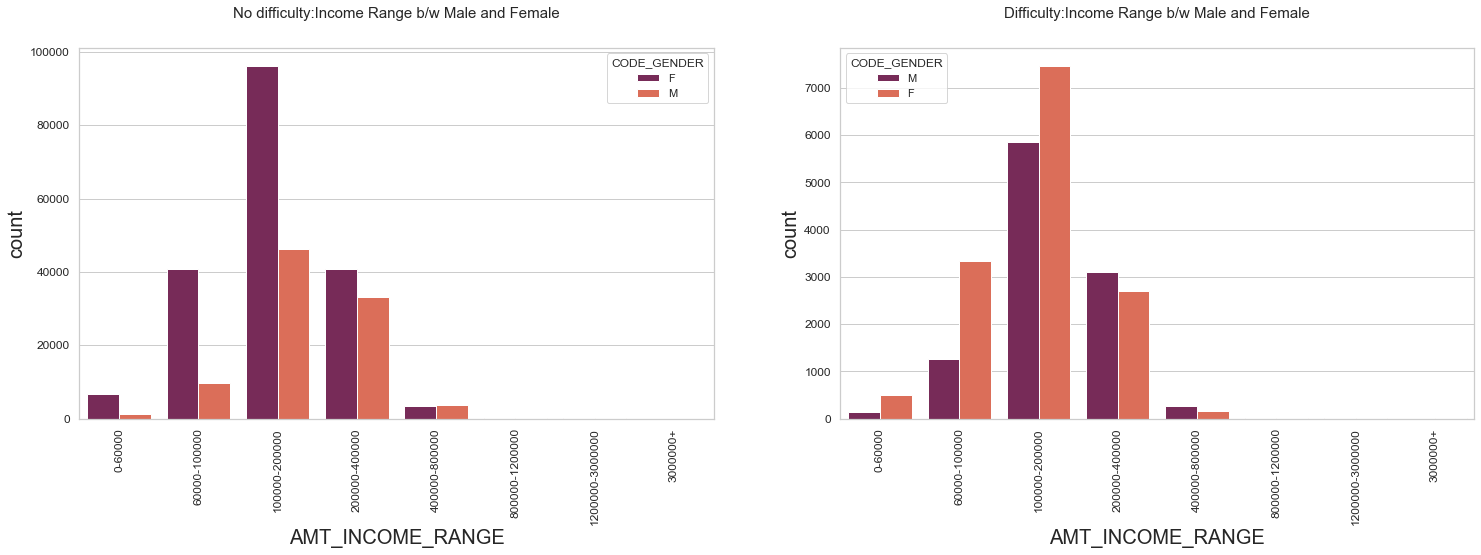

In [96]:
# Numeric variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (25, 15))
plt.subplot(2, 2, 1)
plt.title('No difficulty:Income Range b/w Male and Female')

sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=no_difficulty_df_app, palette='rocket')
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Difficulty:Income Range b/w Male and Female')
plt.xticks(rotation = 90)

sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=difficulty_df_app,palette='rocket')
plt.show()


In [97]:
no_difficulty_df_app.CODE_GENDER.value_counts(normalize=True)*100

F    66.604168
M    33.395832
Name: CODE_GENDER, dtype: float64

In [98]:
difficulty_df_app.CODE_GENDER.value_counts(normalize=True)*100

F    57.082427
M    42.917573
Name: CODE_GENDER, dtype: float64

From the above analysis we can say that females pay back the amount on time as compared to males.

### Box plotting for Income amount

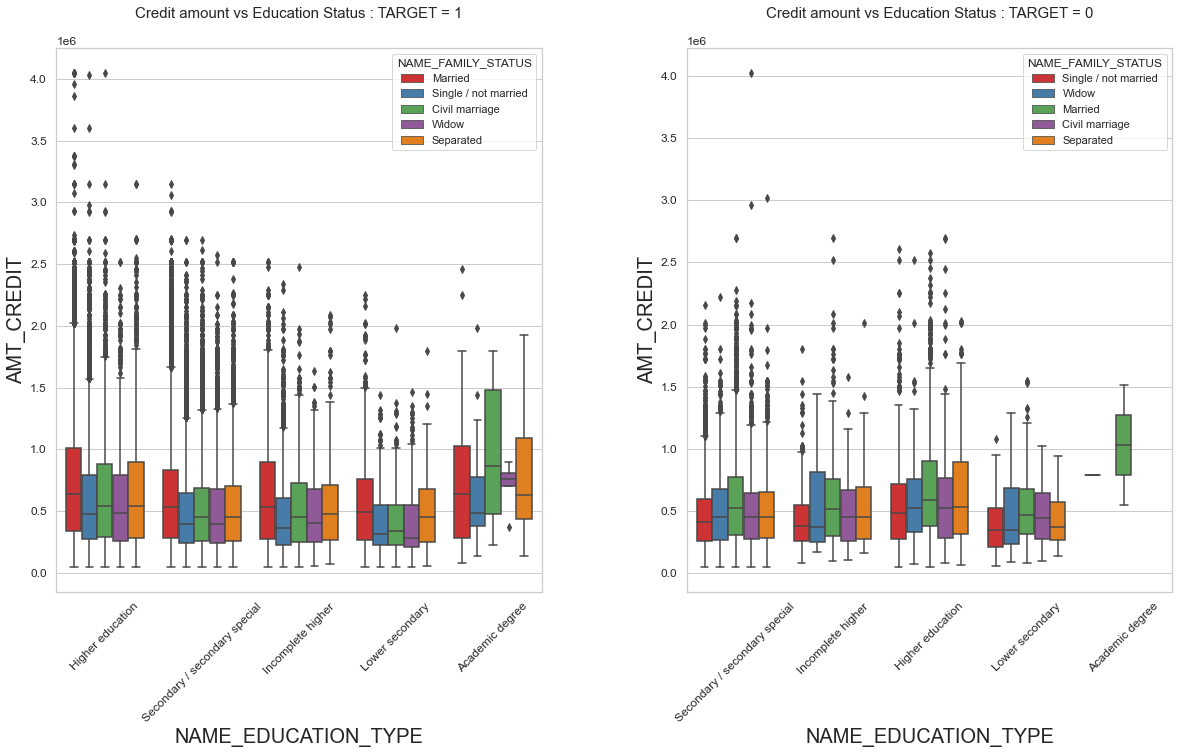

In [99]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3)

plt.subplot(1,2,1)
sns.boxplot(data =no_difficulty_df_app, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]' , palette="Set1")
plt.title('Credit amount vs Education Status : TARGET = 1')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.boxplot(data =difficulty_df_app, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]' , palette="Set1")
plt.title('Credit amount vs Education Status : TARGET = 0')
plt.xticks(rotation=45)
plt.show()

### Read the Previous application data & Inspect  the dataframe

In [100]:
df_prev_app = pd.read_csv("previous_application.csv")

#### Inspecting the dataframe for dimensions, null-values, and summary of different numeric columns.

In [101]:
df_prev_app.shape

(1670214, 37)

In [102]:
df_prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [103]:
df_prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
missingdata_percentage(df_prev_app).sort_values(by='percentage',ascending=False)

,category,percentage
5,RATE_INTEREST_PRIMARY,99.643698
6,RATE_INTEREST_PRIVILEGED,99.643698
2,AMT_DOWN_PAYMENT,53.63648
4,RATE_DOWN_PAYMENT,53.63648
7,NAME_TYPE_SUITE,49.119754
10,DAYS_FIRST_DRAWING,40.298129
11,DAYS_FIRST_DUE,40.298129
12,DAYS_LAST_DUE_1ST_VERSION,40.298129
13,DAYS_LAST_DUE,40.298129
14,DAYS_TERMINATION,40.298129


In [105]:
nullpercent_prev_app=100*(df_prev_app.isna().sum()/len((df_prev_app).index))

In [106]:
nullpercent_prev_app.sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED      99.643698
RATE_INTEREST_PRIMARY         99.643698
AMT_DOWN_PAYMENT              53.636480
RATE_DOWN_PAYMENT             53.636480
NAME_TYPE_SUITE               49.119754
                                ...    
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
AMT_APPLICATION                0.000000
NAME_CONTRACT_TYPE             0.000000
NAME_PAYMENT_TYPE              0.000000
Length: 37, dtype: float64

As it can be seen RATE_INTEREST_PRIVILEGED ,RATE_INTEREST_PRIMARY columns have 99%+ missing values, we will simply drop both the columns, although RATE_DOWN_PAYMENT,AMT_DOWN_PAYMENT has more than 50% missing values, we will keep them as of now, as they are useful business variables

In [107]:
df_prev_app.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY'], axis='columns',inplace=True)
df_prev_app.shape

(1670214, 35)

In [108]:
df_prev_app=df_prev_app.drop(df_prev_app[df_prev_app['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)

df_prev_app=df_prev_app.drop(df_prev_app[df_prev_app['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

### Merging the previous application with the current application data file

In [109]:
merged_df= pd.merge(df_app_data, df_prev_app, how='inner', on='SK_ID_CURR',suffixes='_x')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_IN_YEARS,DAYS_EMPLOYED_IN_YEARS,DAYS_REGISTRATION_IN_YEARS,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,10341,1010,4799.0,3015,1,1,0,1,0,0,Laborers,1.0,2,2,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,NaN,0.0,0.0,0.0,0.0,-599.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,28.33,2.77,13.15,0-200000,60000-100000,25-30,1390369,Cash loans,22430.430,94500.0,109971.0,NaN,94500.0,FRIDAY,11,Y,1,NaN,Other,Approved,-599,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,2668,5266.0,3787,1,1,0,1,0,1,Unknown,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.0,0.0,0.0,0.0,-1634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0,41.86,7.31,14.43,500000-1000000,200000-400000,40-50,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,WEDNESDAY,14,Y,1,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,11694,2060,3557.0,3557,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,0.411849,2.0,0.0,2.0,0.0,-697.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,32.04,5.64,9.75,500000-1000000,200000-400000,30-40,1077565,Cash loans,52513.515,1350000.0,1487214.0,NaN,1350000.0,MONDAY,14,Y,1,NaN,Buying a used car,Approved,-695,Cash through the bank,XAP,Unaccompanied,

In [110]:
new_df = merged_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)
new_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_IN_YEARS,DAYS_EMPLOYED_IN_YEARS,DAYS_REGISTRATION_IN_YEARS,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_START_PREV,HOUR_APPR_PROCESS_START_PREV,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,10341,1010,4799.0,3015,1,1,0,1,0,0,Laborers,1.0,2,2,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,NaN,0.0,0.0,0.0,0.0,-599.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,28.33,2.77,13.15,0-200000,60000-100000,25-30,1390369,Cash loans,22430.430,94500.0,109971.0,NaN,94500.0,FRIDAY,11,Y,1,NaN,Other,Approved,-599,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,2668,5266.0,3787,1,1,0,1,0,1,Unknown,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.0,0.0,0.0,0.0,-1634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0,41.86,7.31,14.43,500000-1000000,200000-400000,40-50,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,WEDNESDAY,14,Y,1,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,11694,2060,3557.0,3557,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,0.411849,2.0,0.0,2.0,0.0,-697.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,32.04,5.64,9.75,500000-1000000,200000-400000,30-40,1077565,Cash loans,52513.515,1350000.0,1487214.0,NaN,1350000.0,MONDAY,14,Y,1,NaN,Buying a used car,Approved,-695,Cash through the bank,XAP

#### Distribution of contract status in logarithmic scale

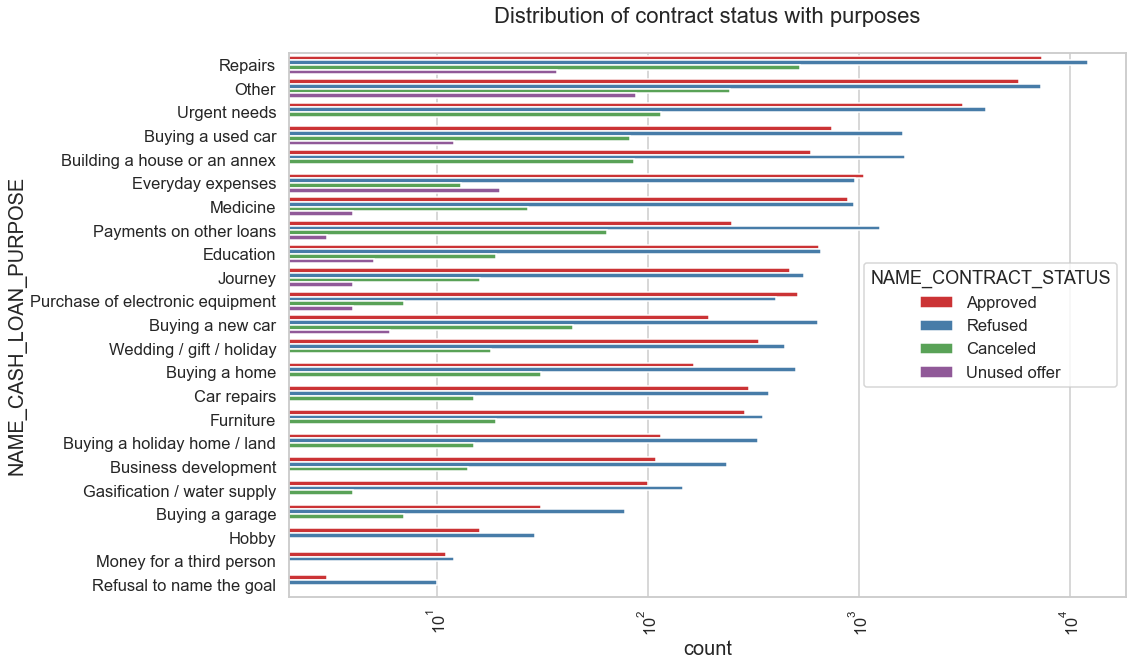

In [111]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,10))
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax=sns.countplot(data = new_df, y='NAME_CASH_LOAN_PURPOSE', order=new_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette="Set1")

Purposes like Buying car or house or payment of other loan has very high approval rate as compared to their own rejection rate.

It is evidant that purpose repairs has the maximum loan refusal rate overally .

Medicine and Education have same number of approved and refused offers.

Repairs has more number of refused than approved which means it has high default rate.

Buying a car also has more refused offers than approved which means banks consider it risky.

### credit amount vs loan purpose

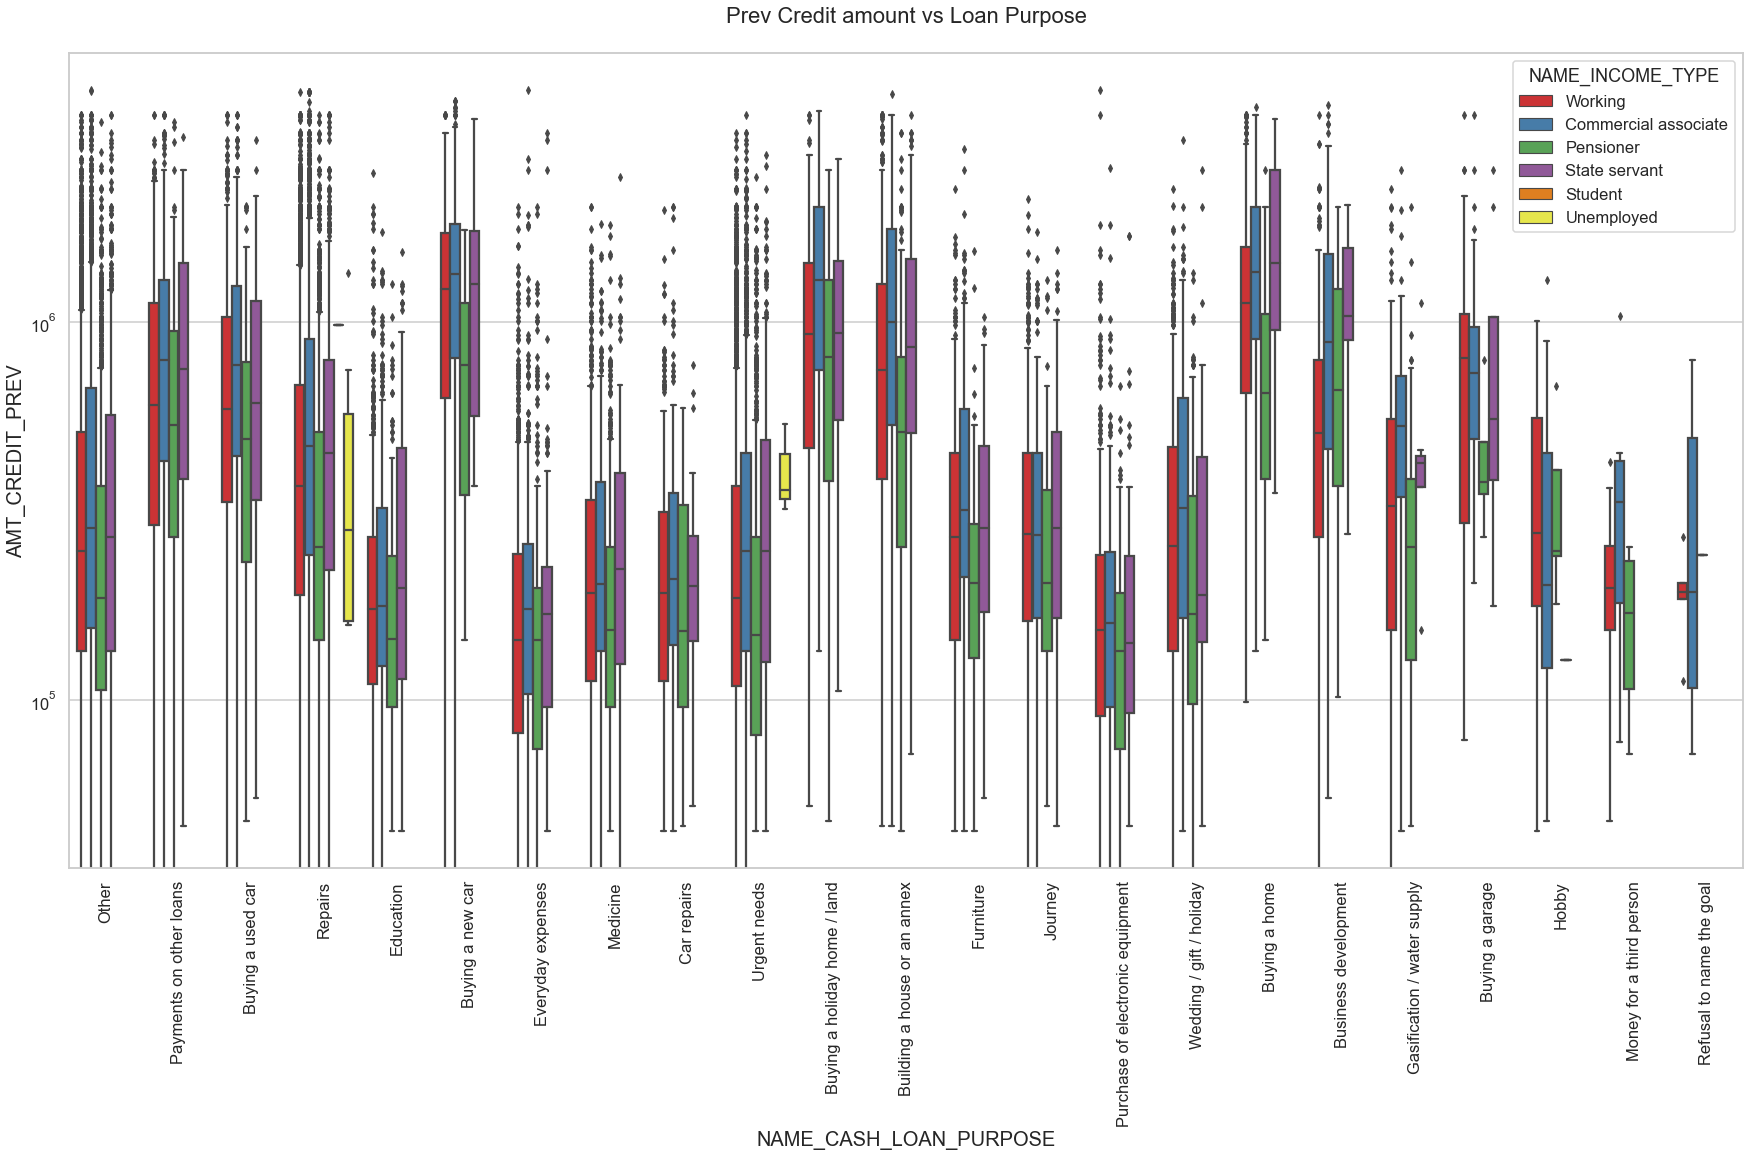

In [112]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
plt.yscale('log')

sns.boxplot(data =new_df, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v' , palette="Set1")
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

### The credit amount of Loan purposes like Buying a home or land or a new car or building a house is higher.

Income type of state servants have a significant amount of credit applied Money for third person or a Hobby is having less credits applied for.

### Credit amount prev vs Housing type

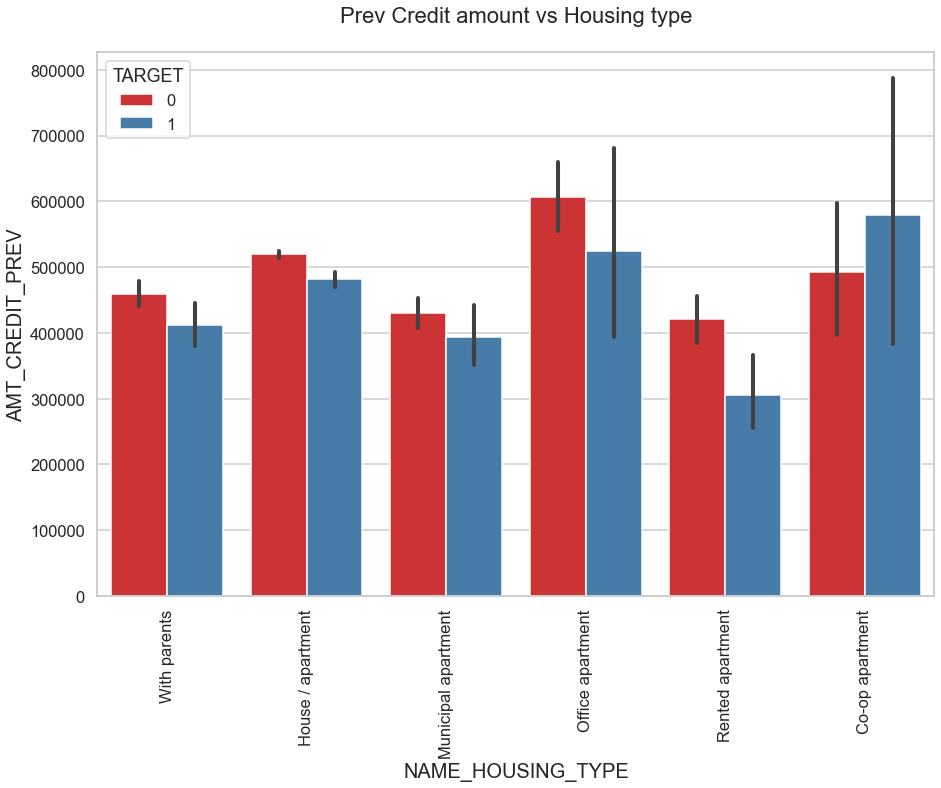

In [113]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(data =new_df, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE', palette="Set1")
plt.title('Prev Credit amount vs Housing type')
plt.show()

customers living in Co-op apartments and Rented Apartments are most likely to be defaulters and bank should avoid accepting their loan applications . Banks should mostly focus on customers hailing from Office Apartments or Living With Partents for assured payback of the Loan